## Requirements

In [ ]:

%%time
!pip install --upgrade --no-cache-dir gdown
!pip install torch==1.6.0 torchvision==0.7.0
!pip uninstall tensorflow -y
!pip install tensorflow-gpu==1.14
!pip install blend_modes
!pip install segmentation_models_pytorch

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=212d17b50805d1cd291581d837d3fca45d66f0725fb6b53aa18edb9f27a2f5db
  Stored in directory: /tmp/pip-ephem-wheel-cache-0uxrbt14/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2
     |████████████████████████████████| 748.8 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 26.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
     

## Prepare Makeup Data

Download Makeup Transfer data (gồm ảnh makeup style (folder makeup) và ảnh source (folder non-makeup))

In [ ]:
cd /content

/content


In [ ]:
!gdown 10tt3m7KKyiOnBPsVKH3V-ypafQgSfLh8

Downloading...
From: https://drive.google.com/uc?id=10tt3m7KKyiOnBPsVKH3V-ypafQgSfLh8
To: /content/images.zip
100% 646M/646M [00:05<00:00, 111MB/s]


In [ ]:
!unzip -q /content/images.zip -d /content/data

Sau khi download va unzip xong sẽ thu được folder như hình bên dưới

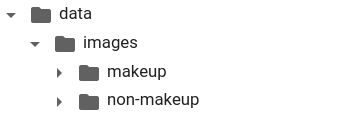

## Prepare Makupe Transfer Module 

download code sử dụng model của paper  Lipstick ain’tenough: Beyond Color Matching for In-the-Wild Makeup Transfer

In [ ]:
!gdown --id 1q__wE09imzKUp_mNxSEH4JQUgbffIy6U

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1q__wE09imzKUp_mNxSEH4JQUgbffIy6U
To: /content/CPM.zip
100% 321M/321M [00:01<00:00, 175MB/s]


In [ ]:
!unzip -q /content/CPM.zip 

In [ ]:
cd /content/CPM

/content/CPM


Sau khi download và unzip makeup transfer module sẽ thu được hình bên dưới 

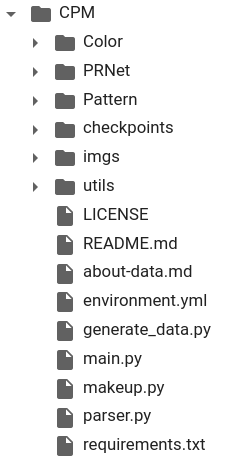

## Check Module

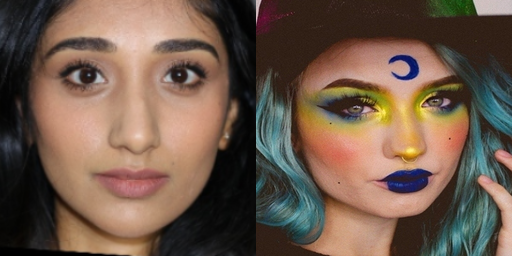

In [ ]:
# Check input images
from PIL import Image
import numpy as np
import os
root_dir = '/content'
path = os.path.join(root_dir, 'CPM')

original = np.array(Image.open('./imgs/non-makeup.png').resize((256, 256), Image.ANTIALIAS))
style = np.array(Image.open('./imgs/style-1.png').resize((256, 256), Image.ANTIALIAS))

Image.fromarray(np.concatenate([original, style], axis=1))

In [ ]:
!python -W ignore main.py --style ./imgs/style-1.png --input ./imgs/non-makeup.png



           ⊱ ──────ஓ๑♡๑ஓ ────── ⊰
🎵 hhey, arguments are here if you need to check 🎵
checkpoint_pattern:      ./checkpoints/pattern.pth
checkpoint_color:        ./checkpoints/color.pth
         device:                           cuda
            prn:                           True
     color_only:                          False
   pattern_only:                          False
          input:          ./imgs/non-makeup.png
          style:             ./imgs/style-1.png
          alpha:                            0.5
        savedir:                              .

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:05<00:00, 17.2MB/s]
2022-03-06 02:11:45.707911: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-03-06 02:11:45.711895: I tensorflow/core/platform/profile_utils/cpu_utils.cc

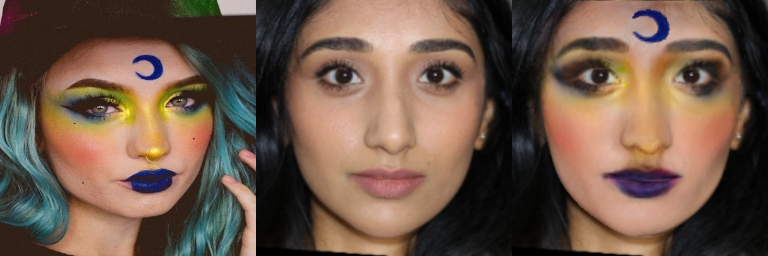

In [ ]:
Image.open(os.path.join(path, 'result.png'))

## Generate De-Makeup Data

In [ ]:
cd /content/CPM

/content/CPM


Các bạn thực hiện code theo yêu cầu trong file **generate_data.py**. Sau đó chạy câu lệnh bên dưới để tạo data 

Chỉ chạy câu lệnh bên dưới sau khi đã hoàn thành các phần trong file **generate_data**.



```python
########### YOUR CODE HERE ################
###########################################
```





**Note:** save_train_path, save_val_path, save_test_path trong file **generate_data.py** là đường dẫn đến vị trí save train/val/test de-makupe data, các bạn phải tạo folder tương ứng với đường dẫn của các bạn thì ảnh mới save được 

In [ ]:
# Cần ~6h để hoàn thanh 1000 train 100 val và 100 test 
!python -W ignore generate_data.py

## Zip Data

In [ ]:
cd /content

/content


In [ ]:
!zip -r makeup_data.zip makeup_data

In [ ]:
mv makeup_data.zip /content/drive/Shareddrives/VGU_Research/AIO/Domain_Conversion

## Reference

Nguyen, T., Tran, A., & Hoai, M. (2021). Lipstick ain’t enough: Beyond Color Matching for In-the-Wild Makeup Transfer. 2021 IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), 13300-13309.

Link Github của paper [Lipstick ain’t enough: Beyond Color Matching for In-the-Wild Makeup Transfer](https://github.com/VinAIResearch/CPM)